## Import Modules

In [ ]:
# Import & alias modules
import math
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
sns.set_style("darkgrid") 
import statsmodels.api as sm
import numpy as np
import scipy.stats

## Bringing in the Dataset
https://github.com/RuiWang-bigdata/Hotel-booking-demand

In [ ]:
# Read data from GitHub
df = pd.read_csv("https://raw.githubusercontent.com/RuiWang-bigdata/Hotel-booking-demand/main/hotel_bookings.csv")

# Familiar with my datasets
# df.info()



df["id"] = df.index + 1
#Due to this dataframe has no unique ID for each observation. So giveing each observation a unique ID. 

In [ ]:
df.head(12)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,4
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,5
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,6
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,7
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,8
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,9
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,10


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,59695.500000
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,34465.068657
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,29848.250000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,59695.500000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,89542.750000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,119390.000000


In [ ]:
df.keys()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'id'],
      dtype='object')

## Explore the Dataset


In [ ]:
# Check for null values chain 🧮 .sum() for all T/F values
df.isnull().sum() #.sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Hotel booking recording shows if this booking without travel agent, booking as individual the columns will shows N/A. So I will leave those null data there for reseach purpose.
Due to this data has world-wide hotel booking record, some contries info is missing. I will remove the data has null in country column.

##Cleaning datasets


In [ ]:
print("The starting size of dataframe is {}".format(len(df)))

# # #drop Nan Rows (Only for null in country column)
clean_df=df.dropna(axis=0, subset=('country', ))
print("The size of the cleaned dataframe is {}".format(len(clean_df)))
##print(clean_df.size)

The starting size of dataframe is 119390
The size of the cleaned dataframe is 118902


##Making sure under the same reasonable condition
1.room Type : A (A has most observation numbers. Code is presented instead of designation for anonymity reasons)


2.is_repeat_guest: Using non repeat guest (Due to some reason repeat guest will book the same hotel without consider other conditions, so repeat guest recording will make the test not 'clean'


3.week or weekends: All the test run with records for 2 weekend nights.

4.booking is not cancled.

In [ ]:
clean_df_1=clean_df[(clean_df.stays_in_weekend_nights==2)]
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33250 entries, 21 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           33250 non-null  object 
 1   is_canceled                     33250 non-null  int64  
 2   lead_time                       33250 non-null  int64  
 3   arrival_date_year               33250 non-null  int64  
 4   arrival_date_month              33250 non-null  object 
 5   arrival_date_week_number        33250 non-null  int64  
 6   arrival_date_day_of_month       33250 non-null  int64  
 7   stays_in_weekend_nights         33250 non-null  int64  
 8   stays_in_week_nights            33250 non-null  int64  
 9   adults                          33250 non-null  int64  
 10  children                        33249 non-null  float64
 11  babies                          33250 non-null  int64  
 12  meal                          

In [ ]:
##Final df 

clean_df_2=clean_df_1[(clean_df_1.reserved_room_type=='A')&(clean_df_1.is_repeated_guest==0)]


clean_df_2.info()
clean_df_2.size


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21106 entries, 21 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21106 non-null  object 
 1   is_canceled                     21106 non-null  int64  
 2   lead_time                       21106 non-null  int64  
 3   arrival_date_year               21106 non-null  int64  
 4   arrival_date_month              21106 non-null  object 
 5   arrival_date_week_number        21106 non-null  int64  
 6   arrival_date_day_of_month       21106 non-null  int64  
 7   stays_in_weekend_nights         21106 non-null  int64  
 8   stays_in_week_nights            21106 non-null  int64  
 9   adults                          21106 non-null  int64  
 10  children                        21106 non-null  float64
 11  babies                          21106 non-null  int64  
 12  meal                          

696498

In [ ]:
final_df=clean_df_2[(clean_df_2.is_canceled==0)]
final_df.info()
final_df.size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 21 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           12791 non-null  object 
 1   is_canceled                     12791 non-null  int64  
 2   lead_time                       12791 non-null  int64  
 3   arrival_date_year               12791 non-null  int64  
 4   arrival_date_month              12791 non-null  object 
 5   arrival_date_week_number        12791 non-null  int64  
 6   arrival_date_day_of_month       12791 non-null  int64  
 7   stays_in_weekend_nights         12791 non-null  int64  
 8   stays_in_week_nights            12791 non-null  int64  
 9   adults                          12791 non-null  int64  
 10  children                        12791 non-null  float64
 11  babies                          12791 non-null  int64  
 12  meal                          

422103

Now dataset is ready for use. 'final_df'

## Find out my observation amounts and Hypothesis

In [ ]:
#Hypothesis 1: City hotel is cheaper than resort hotel per night hich in general
final_df['hotel'].value_counts()

City Hotel      8254
Resort Hotel    4537
Name: hotel, dtype: int64

In [ ]:
#Ciry hotel has 8254 observations and Resort Hotel has 4537 observations(under same group condition).So its good for run the test.

In [ ]:
#Hypothesis 2: Book hotel with special request(s) will cost more than without spcial request
final_df['total_of_special_requests'].value_counts()

0    6007
1    4599
2    1765
3     361
4      52
5       7
Name: total_of_special_requests, dtype: int64

In [ ]:
#For booking without special request has 6007 observations. With spcial request(s) has 6784 observations. So its good for run the test.

In [ ]:
#Hypothesis 3: Booking a hotel with travel agents should be cheaper than booking a hotel directly
final_df['distribution_channel'].value_counts()

TA/TO        11359
Direct        1110
Corporate      309
GDS             12
Undefined        1
Name: distribution_channel, dtype: int64

In [ ]:
#For booking with TA/TO has 11359 observations and for directly booking has 1110 observations. So its good for run the test.

## Analyze the Dataset Hypo 1: City hotel is cheaper than resort hotel per night hich in general

In [ ]:
hypothesis_1_city=final_df[final_df['hotel']=='City Hotel']
city_adr=hypothesis_1_city[['id','adr']]

city_adr.shape
# city_adr.head

(8254, 2)

In [ ]:
hypothesis_1_resort=final_df[final_df['hotel']=='Resort Hotel']
resort_adr = hypothesis_1_resort[['id','adr']]
resort_adr.shape
# resort_adr.head()


(4537, 2)

In [ ]:
#Both new dataframe for hypo 1 is ready. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


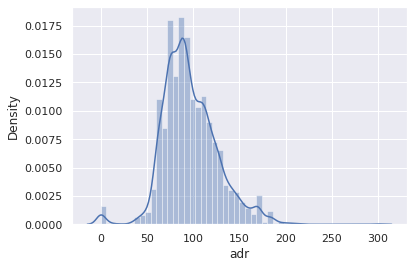

In [ ]:
sns.distplot(city_adr['adr'])
# it follows an approx normal dist

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


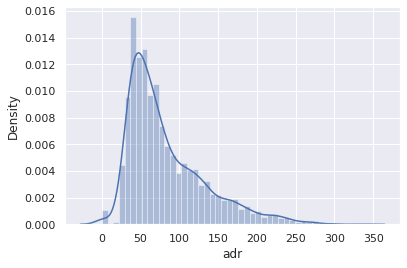

In [ ]:
sns.distplot(resort_adr['adr'])
# it follows an approx normal dist

In [ ]:
city_adr.describe()

,id,adr
count,8254.000000,8254.000000
mean,91676.593773,96.590061
std,22374.685203,29.636303
min,40086.000000,0.000000
25%,83962.250000,76.000000
50%,96920.000000,91.505000
75%,108357.750000,112.957500
max,119390.000000,300.000000


In [ ]:
resort_adr.describe()

,id,adr
count,4537.000000,4537.000000
mean,24692.225039,82.652277
std,11215.256179,49.876023
min,22.000000,0.000000
25%,17696.000000,46.000000
50%,26565.000000,67.000000
75%,34468.000000,107.000000
max,40056.000000,337.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'City Hotel average daily rate')

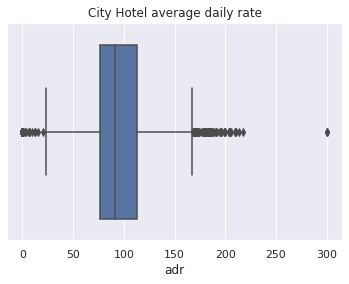

In [ ]:
sns.boxplot(city_adr["adr"])
plt.title('City Hotel average daily rate')

In [ ]:
## 95% confidence interval
city_inter=city_adr['adr']
confidence_level = 0.95
degrees_freedom = city_inter.size - 1
sample_mean = np.mean(city_inter)
sample_standard_error = scipy.stats.sem(city_inter)

confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)


print(confidence_interval)

(95.95061500241786, 97.22950615096326)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Resort Hotel average daily rate')

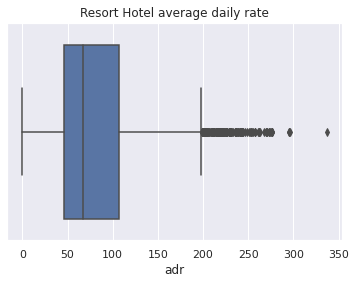

In [ ]:
sns.boxplot(resort_adr["adr"])
plt.title('Resort Hotel average daily rate')

In [ ]:
## 95% confidence interval
resort_inter=resort_adr['adr']
confidence_level = 0.95
degrees_freedom = resort_inter.size - 1
sample_mean = np.mean(resort_inter)
sample_standard_error = scipy.stats.sem(resort_inter)

confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)


print(confidence_interval)

(81.20059508460156, 84.10395858522423)


(95.95061500241786, 97.22950615096326)


In [ ]:
##The describe and boxplot showing each hotel's price condition.

In [ ]:
#RUN the T_TEST 
stats.ttest_ind(city_adr['adr'], resort_adr['adr'])

Ttest_indResult(statistic=19.81112013904392, pvalue=4.634749057013586e-86)

Yes, there is a stat sig difference at the avg hotel price per night between city hotel and resort hotel (b/c **t-stat>1.96** **pval < 0.05**)


Conclusion 1: Under same condition, booking city hotel is expensive than resort. For people who has travel plan in the furture, choosing a city hotel is a money-saving option.

## Analyze the Dataset Hypo 2: Book hotel with special request(s) will cost more than without spcial request

In [ ]:
final_df['total_of_special_requests'].value_counts()

0    6007
1    4599
2    1765
3     361
4      52
5       7
Name: total_of_special_requests, dtype: int64

In [ ]:
hypothesis_2_WO=final_df[final_df['total_of_special_requests']==0]
without_request=hypothesis_2_WO[['id','adr']]

without_request.shape
# city_adr.head

(6007, 2)

In [ ]:
hypothesis_2_With=final_df[final_df['total_of_special_requests']>0]
with_request=hypothesis_2_With[['id','adr']]

with_request.shape
# city_adr.head

(6784, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


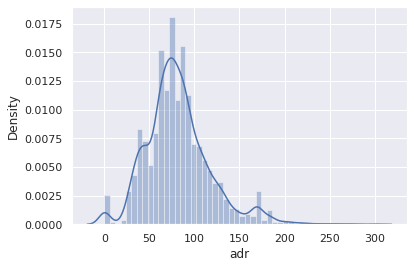

In [ ]:
sns.distplot(without_request['adr'])

In [ ]:
# it follows an approx normal dist

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


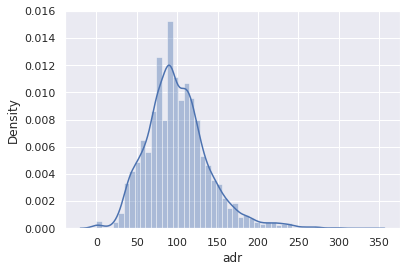

In [ ]:
sns.distplot(with_request['adr'])

In [ ]:
# it follows an approx normal dist

In [ ]:
without_request.describe()

,id,adr
count,6007.000000,6007.000000
mean,62937.420842,81.974323
std,36334.069781,35.931037
min,29.000000,0.000000
25%,30900.500000,61.465000
50%,50400.000000,77.110000
75%,97779.000000,99.000000
max,119389.000000,300.000000


In [ ]:
with_request.describe()

,id,adr
count,6784.000000,6784.000000
mean,72326.377211,100.210492
std,37676.977353,38.944835
min,22.000000,0.000000
25%,34762.500000,74.800000
50%,89064.500000,96.025000
75%,104578.750000,120.337500
max,119390.000000,337.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Booking Without special request')

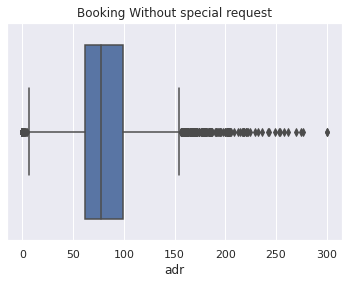

In [ ]:
sns.boxplot(without_request["adr"])
plt.title('Booking Without special request')

In [ ]:
## 95% confidence interval
wo_inter=without_request['adr']
confidence_level = 0.95
degrees_freedom = wo_inter.size - 1
sample_mean = np.mean(wo_inter)
sample_standard_error = scipy.stats.sem(wo_inter)

confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)


print(confidence_interval)

(81.06550604003532, 82.88314053895586)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Booking With special request')

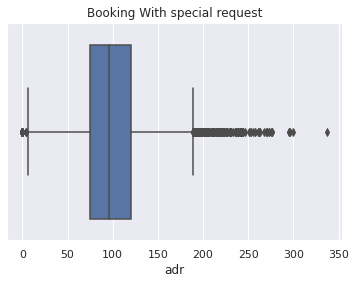

In [ ]:
sns.boxplot(with_request["adr"])
plt.title('Booking With special request')

In [ ]:
## 95% confidence interval
w_inter=with_request['adr']
confidence_level = 0.95
degrees_freedom = w_inter.size - 1
sample_mean = np.mean(w_inter)
sample_standard_error = scipy.stats.sem(w_inter)

confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)


print(confidence_interval)

(99.28359305026075, 101.13739161955164)


In [ ]:
##The describe and boxplot showing each hotel's price condition for with and without special requests .

In [ ]:
#RUN the T_TEST 
stats.ttest_ind(without_request['adr'], with_request['adr'])

Ttest_indResult(statistic=-27.405134215358963, pvalue=9.96406127577746e-161)

Yes, there is a stat sig difference at the avg hotel price per night between with spcial request(s) and without special request(s) (b/c **t-stat>1.96** **pval < 0.05**)

Conclusion 2: Booking hotel with special requests will costs more. If its possible, try to booking witout special requests will save money for customers. And for Hospitality Management, should focuse on how to marketing to make customers booking with more spcial requets. Then could have more income.

## Analyze the Dataset Hypo 3:  Booking a hotel with travel agents should be cheaper than booking a hotel directly

In [ ]:
hypothesis_3_Direct=final_df[final_df['distribution_channel']=='Direct']
direct=hypothesis_3_Direct[['id','adr']]

direct.shape

(1110, 2)

In [ ]:
hypothesis_3_ta_to=final_df[final_df['distribution_channel']=='TA/TO']
ta_to=hypothesis_3_ta_to[['id','adr']]

ta_to.shape

(11359, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


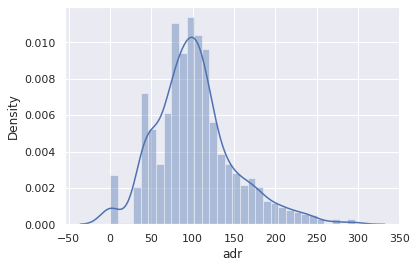

In [ ]:
sns.distplot(direct['adr'])

In [ ]:
# it follows an approx normal dist

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


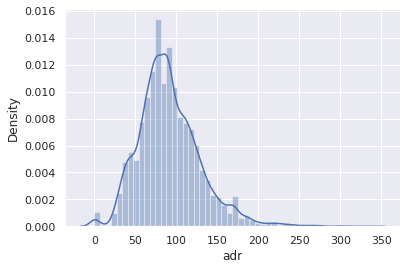

In [ ]:
sns.distplot(ta_to['adr'])

In [ ]:
# it follows an approx normal dist

In [ ]:
direct.describe()

,id,adr
count,1110.000000,1110.000000
mean,61634.431532,102.387441
std,39123.767872,48.486115
min,22.000000,0.000000
25%,26691.250000,74.212500
50%,46776.500000,98.300000
75%,100004.250000,123.277500
max,119382.000000,296.330000


In [ ]:
ta_to.describe()

,id,adr
count,11359.000000,11359.000000
mean,68767.402500,91.169807
std,37001.465402,37.358379
min,29.000000,0.000000
25%,34349.500000,67.150000
50%,83673.000000,87.000000
75%,102221.500000,112.500000
max,119390.000000,337.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Booking Directly')

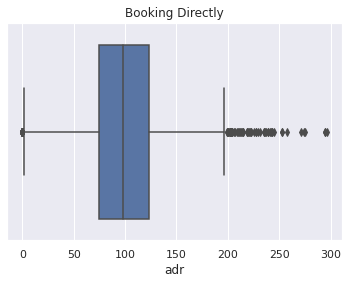

In [ ]:
sns.boxplot(direct["adr"])
plt.title('Booking Directly')

In [ ]:
## 95% confidence interval
d_inter=direct['adr']
confidence_level = 0.95
degrees_freedom = d_inter.size - 1
sample_mean = np.mean(d_inter)
sample_standard_error = scipy.stats.sem(d_inter)

confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)


print(confidence_interval)

(99.53196731313406, 105.24291556974887)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Booking with Travel Agent')

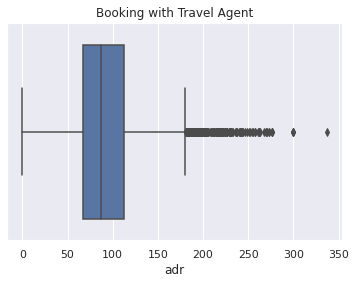

In [ ]:
sns.boxplot(ta_to["adr"])
plt.title('Booking with Travel Agent')

In [ ]:
## 95% confidence interval
ta_inter=ta_to['adr']
confidence_level = 0.95
degrees_freedom = ta_inter.size - 1
sample_mean = np.mean(ta_inter)
sample_standard_error = scipy.stats.sem(ta_inter)

confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)


print(confidence_interval)

(90.48271921787723, 91.8568951847996)


In [ ]:
##The describe and boxplot showing each hotel's price condition for booking directly and booking with travel agent .

In [ ]:
#RUN the T_TEST 
stats.ttest_ind(direct['adr'], ta_to['adr'])

Ttest_indResult(statistic=9.27032047251543, pvalue=2.1580307925329293e-20)

Yes, there is a stat sig difference at the avg hotel price per night between booking directly and booking with travel agent (b/c **t-stat>1.96** **pval < 0.05**)

Conclusion 3: Booking hotel with Travel agent is a good options for having a lower price.So tring to find a travel agent to book your next trip will be a better option instead of booking directly. 